In [1]:
from keras.api.datasets import mnist
from keras.api.utils import to_categorical

# Loading up the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Changing to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
from sklearn.model_selection import train_test_split
# Splitting up train dataset into sub_train and valid
# Allocating 50,000 samples to sub_train and remaining 10,000 samples to valid
sub_train_x, valid_x, sub_train_y, valid_y = train_test_split(x_train, y_train, train_size=50000, test_size=10000, random_state=42)

In [3]:
from keras import models, layers, initializers, optimizers

def build_model(hp):
    """
    Building the neural network
        - Excluding the convolution('Conv') layer
        - Using the cross entropy loss function
    """
    model = models.Sequential() # Sequential Model
    model.add(layers.Flatten()) # Flattening(Enumerating) 2-d array to 1-d array

    for i in range(hp.Int('num_layers', 1, 5)):
        # Assigning number of layers
        model.add(layers.Dense(
            units=hp.Int('units', min_value=32, max_value=512, step=32),
            activation=hp.Choice('activation', ['relu', 'sigmoid', 'tanh', 'softplus', 'linear', 'exponential']),
            kernel_initializer=initializers.RandomNormal(stddev=0.01),
            bias_initializer=initializers.Ones()
        ))

    model.add(layers.Dense(10, activation='softmax'))

    # Designing the network
    model.compile(
        optimizer=optimizers.Adam(
            # Experimenting with at least 3 values
            # with learning_rate, beta_1, beta_2 hyperparameters
            learning_rate=hp.Choice('learning_rate', [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]),
            beta_1=hp.Choice('beta_1', [0.99, 0.9, 0.85, 0.8, 0.75]),
            beta_2=hp.Choice('beta_2', [0.99, 0.98, 0.97, 0.95, 0.90])
        ),
        # Cross-entropy loss function
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [4]:
# Making sure keras-tuner is downloaded and up-to-date(Had problems in google colab)
!pip install keras_tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [5]:
import keras_tuner

# Building the model and calling keras_tuner
build_model(keras_tuner.HyperParameters())
# Letting it randomly choose the number of layers
tuner=keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=15 # Keeping it greater than 10
)

In [6]:
# Performing search space
tuner.search_space_summary()

Search space summary
Default search space size: 6
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh', 'softplus', 'linear', 'exponential'], 'ordered': False}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001, 1e-05], 'ordered': True}
beta_1 (Choice)
{'default': 0.99, 'conditions': [], 'values': [0.99, 0.9, 0.85, 0.8, 0.75], 'ordered': True}
beta_2 (Choice)
{'default': 0.99, 'conditions': [], 'values': [0.99, 0.98, 0.97, 0.95, 0.9], 'ordered': True}


In [7]:
# Performing search
tuner.search(sub_train_x, sub_train_y, epochs=10, validation_data=(valid_x, valid_y))

Trial 15 Complete [00h 01m 35s]
val_accuracy: 0.9465000033378601

Best val_accuracy So Far: 0.9721999764442444
Total elapsed time: 00h 43m 23s


In [8]:
# Getting the best models
models = tuner.get_best_models()
models[0].summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 480)                 │         376,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 480)                 │         230,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 480)                 │         230,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 480)                 │         230,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 480)                 │         230,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           4,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,305,130 (4.98 MB)

 Trainable params: 1,305,130 (4.98 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Getting the summary of the top hyperparameters
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 11 summary
Hyperparameters:
num_layers: 5
units: 480
activation: softplus
learning_rate: 1e-05
beta_1: 0.75
beta_2: 0.9
Score: 0.9721999764442444

Trial 04 summary
Hyperparameters:
num_layers: 4
units: 288
activation: softplus
learning_rate: 1e-05
beta_1: 0.99
beta_2: 0.9
Score: 0.9685999751091003

Trial 14 summary
Hyperparameters:
num_layers: 1
units: 288
activation: relu
learning_rate: 1e-05
beta_1: 0.8
beta_2: 0.97
Score: 0.9465000033378601

Trial 03 summary
Hyperparameters:
num_layers: 5
units: 512
activation: sigmoid
learning_rate: 0.0001
beta_1: 0.75
beta_2: 0.97
Score: 0.9251000285148621

Trial 07 summary
Hyperparameters:
num_layers: 3
units: 416
activation: linear
learning_rate: 1e-05
beta_1: 0.8
beta_2: 0.98
Score: 0.9211000204086304

Trial 09 summary
Hyperparameters:
num_layers: 2
units: 480
activation: linear
learning_rate: 0.0001
beta_1: 0.9
beta_2: 0.

In [10]:
# Getting the best hyperparameter
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values

{'num_layers': 5,
 'units': 480,
 'activation': 'softplus',
 'learning_rate': 1e-05,
 'beta_1': 0.75,
 'beta_2': 0.9}

In [11]:
# Training the best model(models[0]) with sub_train and valid
best_model = models[0]
history = best_model.fit(sub_train_x, sub_train_y, epochs=20, validation_data=(valid_x, valid_y))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9802 - loss: 0.0655 - val_accuracy: 0.9723 - val_loss: 0.0983
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9822 - loss: 0.0578 - val_accuracy: 0.9722 - val_loss: 0.0930
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.9845 - loss: 0.0515 - val_accuracy: 0.9735 - val_loss: 0.0939
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9862 - loss: 0.0487 - val_accuracy: 0.9748 - val_loss: 0.0926
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.9878 - loss: 0.0420 - val_accuracy: 0.9768 - val_loss: 0.0879
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9890 - loss: 0.0399 - val_accuracy: 0.9763 - val_loss: 0.0892
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9889 - loss: 0.0365 - val_accuracy: 0.9759 - val_loss: 0.0923
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9912 -

In [12]:
# Evaluating the best model on the testing dataset
test_loss, test_accuracy = best_model.evaluate(valid_x, valid_y)
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9788 - loss: 0.1239
Test Accuracy: 0.9786999821662903


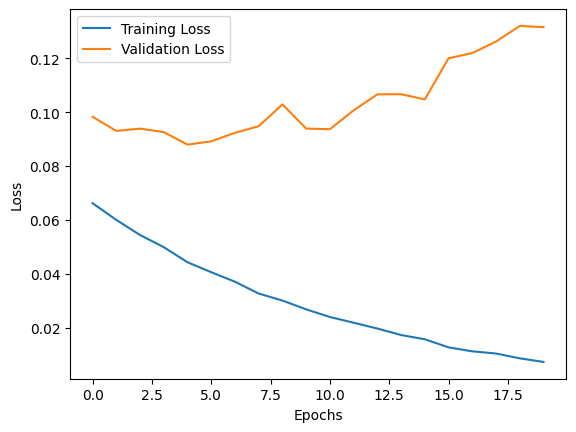

In [13]:
# Plotting the graph for training and validation loss
import matplotlib.pyplot as plt

# Plotting 'Training Loss'
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()